# This notebook critically explores the E-Governance Index and the Open Data Barometer for years 2014 and 2016.

Using years 2014 and 2016 highlight and important moment in the governmental data sphere. In the early 20-teens, wealthy countries worked to build open data portals and set policies.

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import csv
import os
from pprint import pprint
import requests
import json
import html
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import chi2_contingency

In [21]:
#Opening the merged data frame. This DF includes 43 columns and 79 rows of the 2014 and 2016 Open Data Barometer and E-Government Index measurements. 
#Although t
df_1416 = pd.read_csv("../newmerge_1416.csv")
df_1416

,Region_2014,ISO,ODB-Rank_2014,Country,ODB-Score-Scaled_2014,Readiness-Scaled_2014,Implementation-Innovation-Scaled_2014,Implementation-Social-Scaled_2014,Implementation-Accountability-Scaled_2014,Implementation-Rank_2014,...,Impact-Political-Scaled_2016,Impact-Social-Scaled_2016,Impact-Economic-Scaled_2016,Impact-Rank_2016,E-Government Rank_2016,E-Government Index_2016,E-Participation Index_2016,Online Service Index_2016,Human Capital Index_2016,Telecommunication Infrastructure Index_2016
0,Europe & Central Asia,SE,3,Sweden,83.70,100,67,81,71,4,...,29,50,32,20,6,0.87039,0.76271,0.87681,0.92096,0.81339
1,Europe & Central Asia,FR,4,France,80.21,91,75,79,61,7,...,90,55,62,5,10,0.84559,0.89831,0.94203,0.84452,0.75021
2,East Asia & Pacific,NZ,4,New Zealand,80.01,81,76,83,92,3,...,81,100,55,2,8,0.86530,0.94915,0.94203,0.94024,0.71364
3,Europe & Central Asia,NL,6,Netherlands,75.79,95,79,82,56,5,...,63,50,47,16,7,0.86586,0.94915,0.92754,0.91830,0.75173
4,Europe & Central Asia,NO,7,Norway,74.59,88,70,83,58,8,...,92,20,58,13,18,0.81168,0.76271,0.80435,0.90306,0.72764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Middle East & North Africa,YE,82,Yemen,5.80,12,8,9,11,81,...,0,0,0,113,174,0.22478,0.13559,0.14493,0.38288,0.14655
75,Sub-Saharan Africa,CM,83,Cameroon,3.77,11,6,6,7,83,...,18,0,0,74,155,0.27591,0.16949,0.21739,0.47938,0.13096
76,Sub-Saharan Africa,ML,84,Mali,3.30,19,2,2,6,86,...,0,0,0,103,182,0.18165,0.06780,0.09420,0.23583,0.21492
77,Latin America & Caribbean,HT,85,Haiti,1.19,5,4,5,7,84,...,0,0,0,99,178,0.19314,0.13559,0.16667,0.31240,0.10036


Comparing two datasets by year meant a lot of cleaning to align the four sets for complete comparison. The Open Data Barometer 2014 was the most limited dataset, with just 79 countries. Notably missing from the datasets is the United States, which did not provide data for the 2014 Open Data Barometer Index.

# E Gov Index by country and region 2014

In [19]:
#Preparing the E government Index to be bar charted by country. 
df_14_16 = df_1416.sort_values(by = "E-Government Index_2014")
x_axis = df_14_16['Country']
y_axis = df_14_16["E-Government Index_2014"]
order = "Sub-Saharan Africa", "Latin America & Caribbean", "Middle East & North Africa", "East Asia & Pacific", "South Asia", "Europe & Central Asia", "North America"

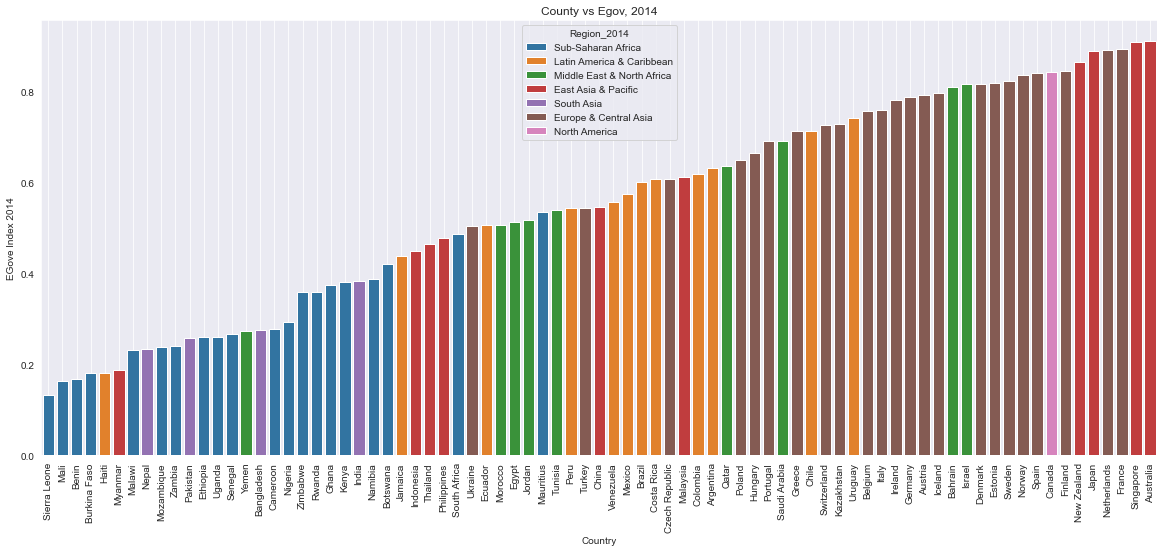

In [20]:
#Using seaborn colors this function graphs a bar graph of every country and it's E-Gov Index Score. In addition, seaborn colors each region with a specific hue. 
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    plt.figure(figsize=(20,8))
    #plt.bar(x_axis, y_axis)
    sns.barplot(x = x_axis, y = y_axis, data = df_14_16, hue = "Region_2014", hue_order = order, dodge=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()
    
country_graph(x_axis, y_axis, "County vs Egov, 2014", "Country", "EGove Index 2014", (3,14))

The E-Gov vs. ODB graph for 2014 and with color differentiation by region tells us mostly what we would expect. High scoring countries are in the East Asia & Pacific Regions, North America, and Europe and Central Asia. There's a lot of variability in the regions, with East Asia and the Pacific occupying both the best scores as well as some of the lowest. Notably, each region except Sub-Saharan Africa hold some of the top positions.

# E Gov Index 2016 by country and region

In [17]:
#Preparing the dataset for 2016 E-government index scores by country highlighting regions
df_14_16 = df_1416.sort_values(by = "E-Government Index_2016")
x_axis = df_14_16['Country']
y_axis = df_14_16["E-Government Index_2016"]
order = "Sub-Saharan Africa", "Latin America & Caribbean", "Middle East & North Africa", "East Asia & Pacific", "South Asia", "Europe & Central Asia", "North America"

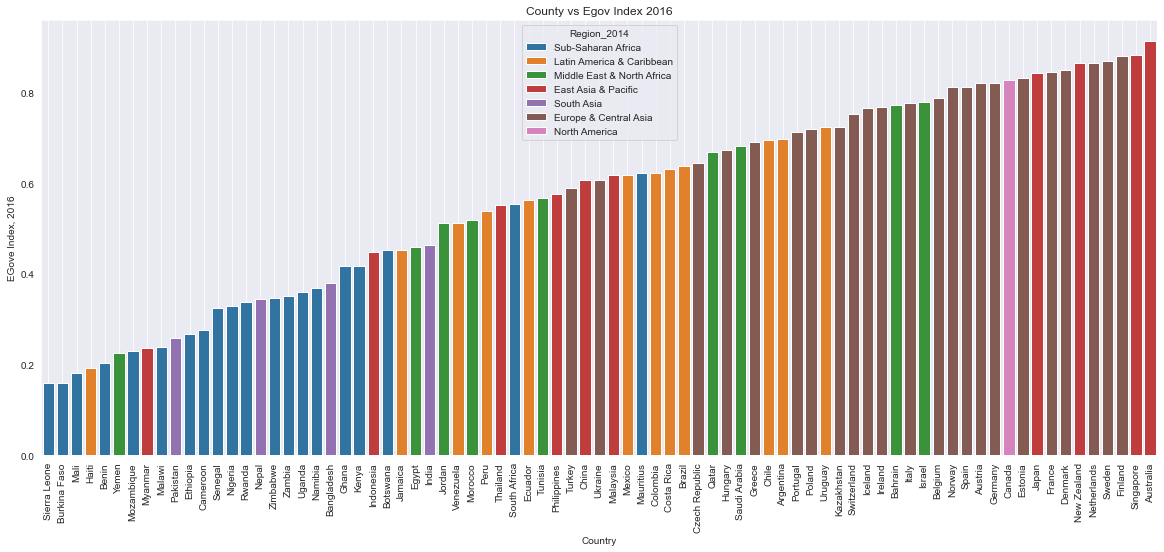

In [18]:
def country_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #graphing
    plt.figure(figsize=(20,8))
    #plt.bar(x_axis, y_axis)
    sns.barplot(x = x_axis, y = y_axis, data = df_14_16, hue = "Region_2014", hue_order = order, dodge=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()
country_graphing(x_axis, y_axis, "County vs Egov Index 2016", "Country", "EGove Index, 2016", (3,14))
sns.set_style('darkgrid')

The 2016 bar graph shows a fairly similar layout to the 2014 bar graph, with East Asia & Pacific as well as Europe & Central Asia occupying the top spots. Notably in the center of the graph, some of the countries in the Middle East dropped scores between 2014 and 2016.

# Open Data Barometer Scores by Country, 2014

In [26]:
#Preparing the 2014 Scaled ODB scores to be bar charted by country. 
df_14_16 = df_1416.sort_values(by = "ODB-Score-Scaled_2014")
x_axis = df_14_16['Country']
y_axis = df_14_16["ODB-Score-Scaled_2014"]
order = "Sub-Saharan Africa", "Latin America & Caribbean", "Middle East & North Africa", "East Asia & Pacific", "South Asia", "Europe & Central Asia", "North America"

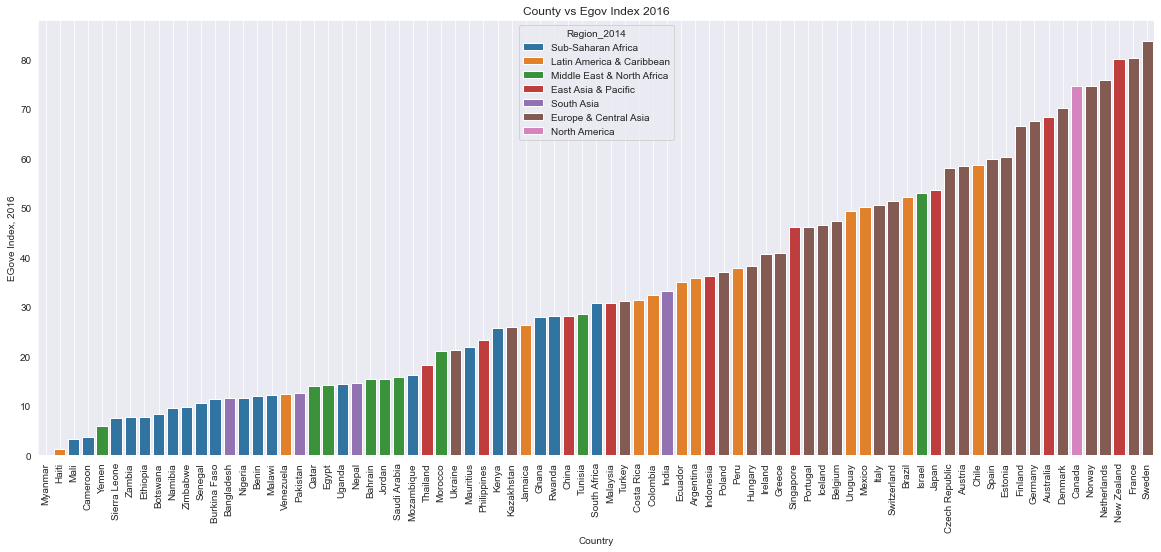

In [25]:
#Function to plot the ODB scores by country, seaborn hue colors by region.
def country_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #graphing
    plt.figure(figsize=(20,8))
    sns.barplot(x = x_axis, y = y_axis, data = df_14_16, hue = "Region_2014", hue_order = order, dodge=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()
country_graphing(x_axis, y_axis, "County vs ODB Score, 2014", "Country", "ODB Score, 2016", (3,14))
sns.set_style('darkgrid')

Plotting the shape of the 2014 ODB scores by country we see a similar trend to the E-Gov Scores, East Asia & Pacific and Europe & Central Asia occupy the highest scores. A major difference between the indexes is that the Latin America & Caribbean region have higher open data scores than they do E-Governance scores. 

Questions arise about Latin America: With lower E-Services scores, where is the data coming from if not e-services? Are they sharing a higher proportion of the data they collect?

# Open Data Barometer Scores by Country, 2016

In [28]:
#Preparing the dataset for 2016 ODB scores by country highlighting regions
df_14_16 = df_1416.sort_values(by = "ODB-Score-Scaled_2016")
x_axis = df_14_16['Country']
y_axis = df_14_16["ODB-Score-Scaled_2016"]
order = "Sub-Saharan Africa", "Latin America & Caribbean", "Middle East & North Africa", "East Asia & Pacific", "South Asia", "Europe & Central Asia", "North America"

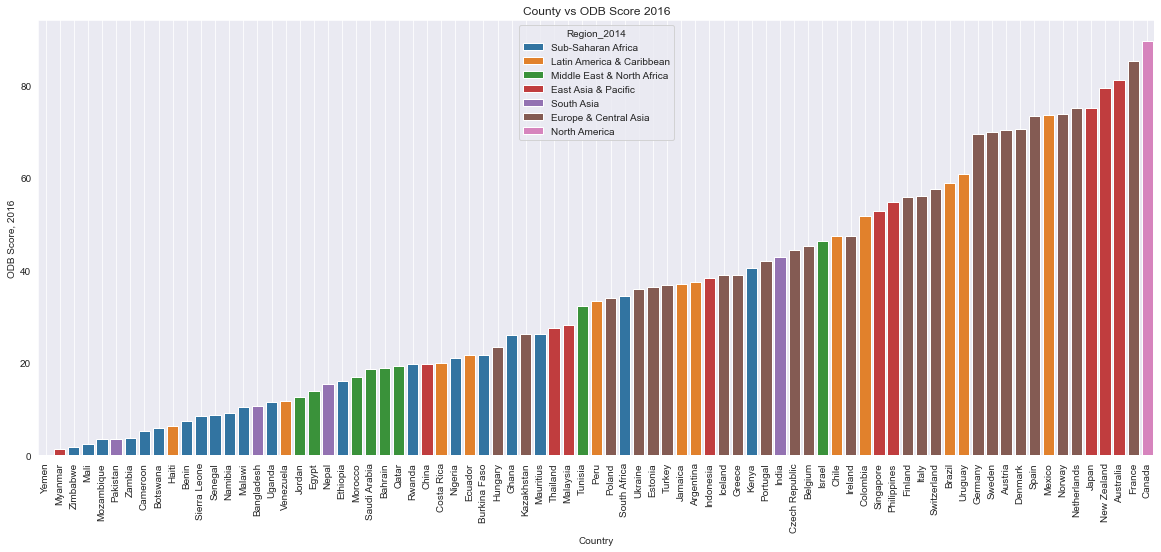

In [29]:
def country_graphing(x_axis, y_axis, title, xlabel, ylabel, text_coordinates):
    #graphing
    plt.figure(figsize=(20,8))
    sns.barplot(x = x_axis, y = y_axis, data = df_14_16, hue = "Region_2014", hue_order = order, dodge=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.grid()
country_graphing(x_axis, y_axis, "County vs ODB Score 2016", "Country", "ODB Score, 2016", (3,14))
sns.set_style('darkgrid')

After the data cleaning process, Canada was the only country which had data for all four datasets. In the 2016 ODB score list, they rank first - suggesting there may be an interesting political/civic change in Canada from 2014 to 2016 in regards to open data. A place for further exploration. 

# E Gov vs ODB 2014

After charting the overall shape of the data the next step is to graph the compared indexes for both years. The first graph shows EGov and ODB for 2014 and the next shows Egov vs ODB for 2014. E-Governance is the independent variable assuming that data arises from e-services 

In [71]:
#Setting the x and y axis for the 2014 comparison graph
x_axis = df_14_16['E-Government Index_2014']
y_axis = df_14_16['ODB-Score-Scaled_2014']
order = "Sub-Saharan Africa", "Latin America & Caribbean", "Middle East & North Africa", "East Asia & Pacific", "South Asia", "Europe & Central Asia", "North America"

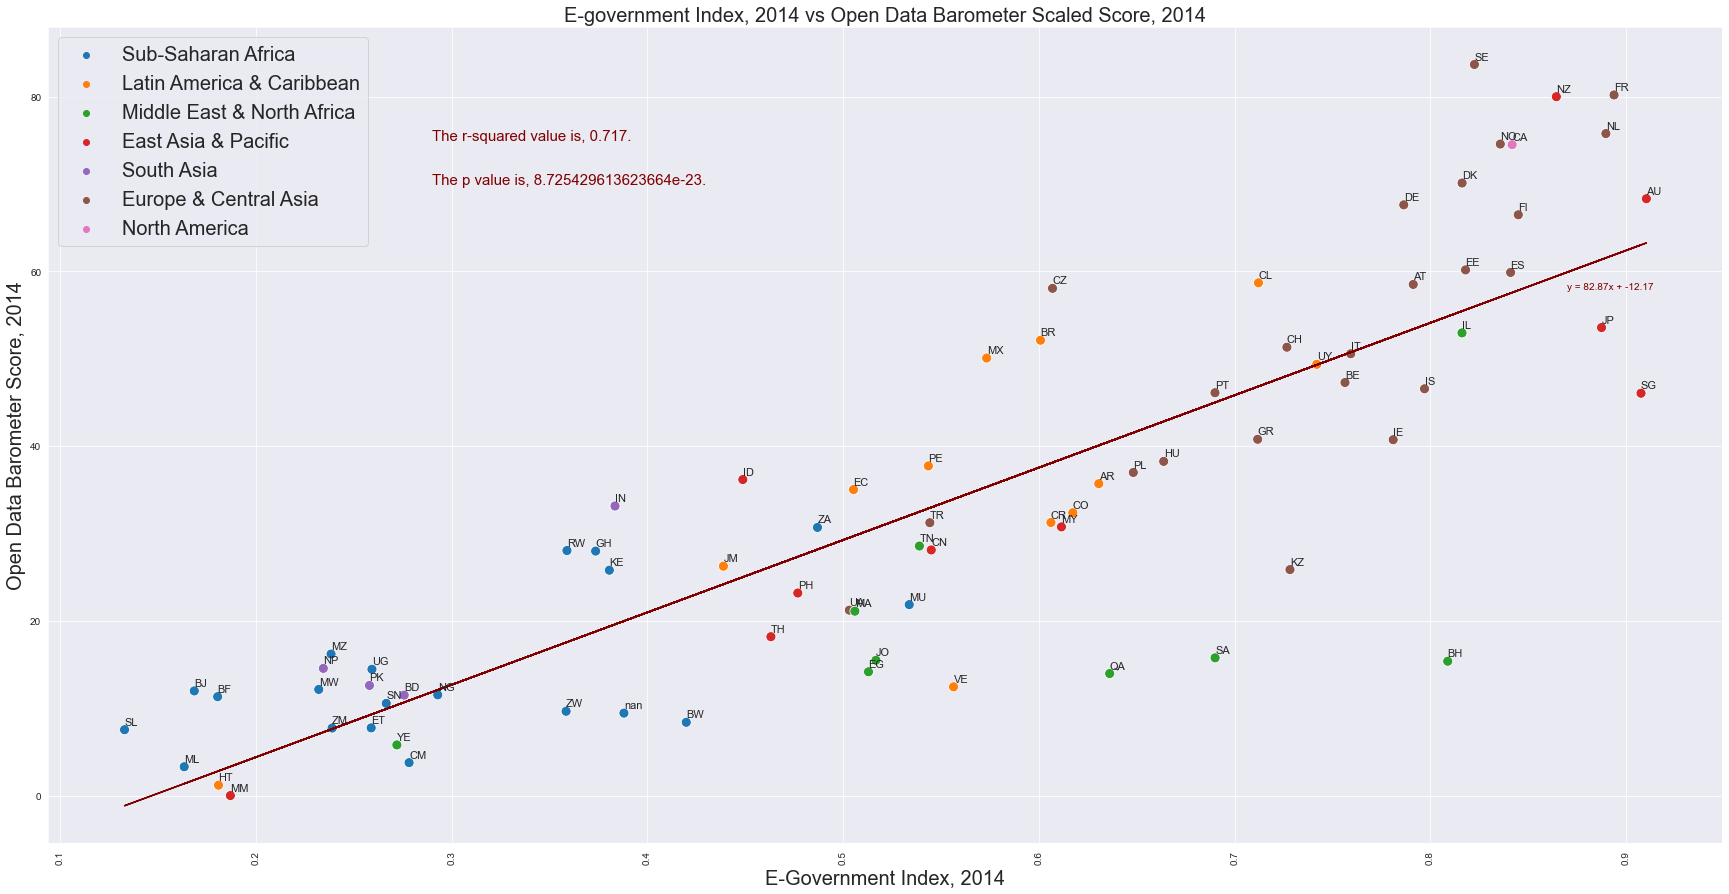

In [72]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(30, 15))
    sns.scatterplot(x = x_axis, y = y_axis, data = df_1416, hue = 'Region_2014', hue_order = order, s=100)
    #Labeling the Graph
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
    plt.legend(fontsize = 20)
    plt.tight_layout
    #Annotating the linear regression, r-squared and p-values
    plt.annotate(line_eq, text_coordinates, fontsize=10 ,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(df_1416['ISO']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha = 'left', va='center_baseline')
    
country_graph(x_axis, y_axis, "E-government Index, 2014 vs Open Data Barometer Scaled Score, 2014", "E-Government Index, 2014", "Open Data Barometer Score, 2014", (.87,58), (.29, 75), (.29,70))

In 2014, the shape of this graph suggests a strong positive correlation between E-Governance and Open Data. To gain additional understanding, I ran a linear regression which gave an r-squared value of .717, indicating that the model is a good fit for the data. In additional I calculated the p-value which is very, very small indicating that there is a statistically significant correlation between e-governance and open data. 

With additional research and time, I would like to do some adjust text features on this graph to be able to use the full country names and not have them overlap. 

# E-Gov and ODB 2016

In [73]:
x_axis = df_14_16['E-Government Index_2016']
y_axis = df_14_16['ODB-Score-Scaled_2016']
order = "Sub-Saharan Africa", "Latin America & Caribbean", "Middle East & North Africa", "East Asia & Pacific", "South Asia", "Europe & Central Asia", "North America"

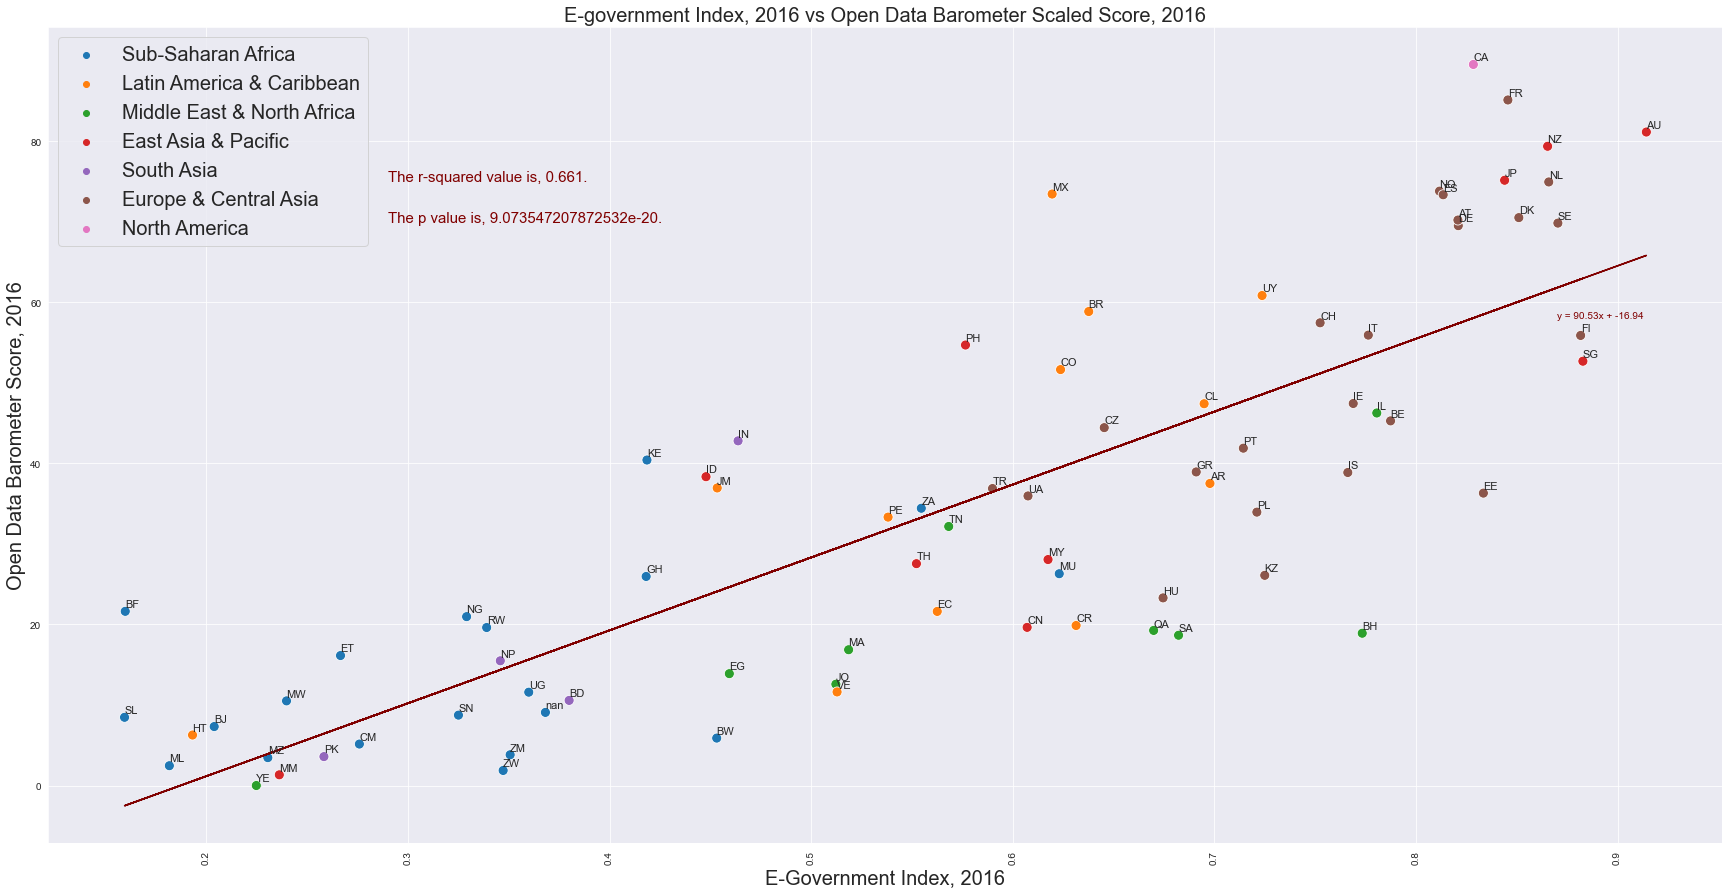

In [75]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(30, 15))
    sns.scatterplot(x = x_axis, y = y_axis, data = df_1416, hue = 'Region_2014', hue_order = order, s=100)
    #Labeling the Graph
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
    plt.legend(fontsize = 20)
    plt.tight_layout
    #Annotating the linear regression, r-squared and p-values
    plt.annotate(line_eq, text_coordinates, fontsize=10 ,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(df_1416['ISO']):
        plt.text(x_axis[i], y_axis[i]+1,label, size=11, ha = 'left', va='center_baseline')
    
country_graph(x_axis, y_axis, "E-government Index, 2016 vs Open Data Barometer Scaled Score, 2016", "E-Government Index, 2016", "Open Data Barometer Score, 2016", (.87,58), (.29, 75), (.29,70))

The 2016 comparison between E Governance and Open Data, again demonstrates a strong positive correlation between the two datasets. However, a contrast to 2014 shows a greater spread to the data points. When running the linear regression and calculating the r-squared value, the regression is a slightly less good fit for the data, with an r-squared value slightly lower than for 2014. However, when determining the statistical significance, a very small p-value shows that there is still a statistically significant relationship between the two datasets. 

# Regional graphing: Egov vs ODB for Latin America 2014 and 2016 and Europe 2014 and 2016

As mentioned above, some regions changed between the datasets. Europe was overall strong across all four datasets, and Latin America showed marked improvement from 2014 to 2016. Below are graphs showing those changes. 

In [97]:
#Latin America df using Egov and ODB 2014
latin_region_2014 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2014', 'ODB-Score-Scaled_2014']]
latin_region_2014 = latin_region_2014[latin_region_2014['Region_2014'] == 'Latin America & Caribbean']
latin_region_2014 = latin_region_2014.reset_index(drop=True)

In [98]:
x_axis = latin_region_2014['E-Government Index_2014']
y_axis = latin_region_2014['ODB-Score-Scaled_2014']

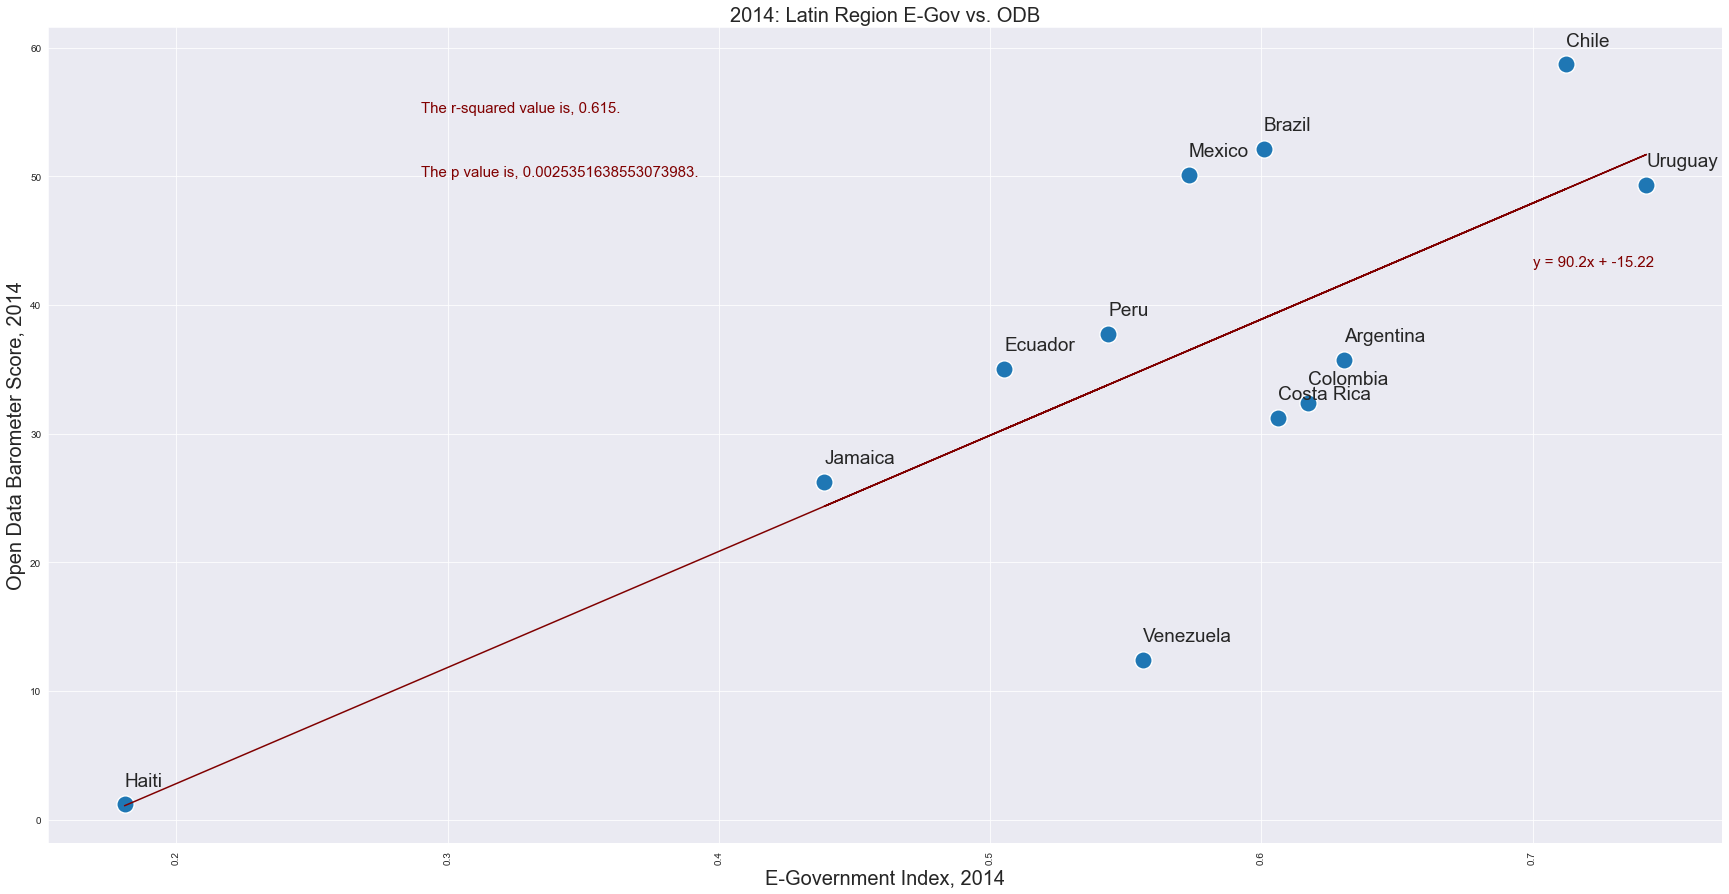

In [102]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(30, 15))
    sns.scatterplot(x = x_axis, y = y_axis, data = latin_region_2016, s=300)
    #Labeling the Graph
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
#     plt.legend(fontsize = 20)
    plt.tight_layout
    #Annotating the linear regression, r-squared and p-values
    plt.annotate(line_eq, text_coordinates, fontsize=15 ,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(latin_region_2014['Country']):
        plt.text(x_axis[i], y_axis[i]+2,label, size=19, ha = 'left', va='center_baseline')
    
country_graph(x_axis, y_axis, "2014: Latin Region E-Gov vs. ODB", "E-Government Index, 2014", "Open Data Barometer Score, 2014", (.7,43), (.29, 55), (.29,50))

In [76]:
latin_region_2016 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2016', 'ODB-Score-Scaled_2016']]
latin_region_2016 = latin_region_2016[latin_region_2016['Region_2014'] == 'Latin America & Caribbean']
latin_region_2016 = latin_region_2016.reset_index(drop=True)

In [77]:
x_axis = latin_region_2016['E-Government Index_2016']
y_axis = latin_region_2016['ODB-Score-Scaled_2016']

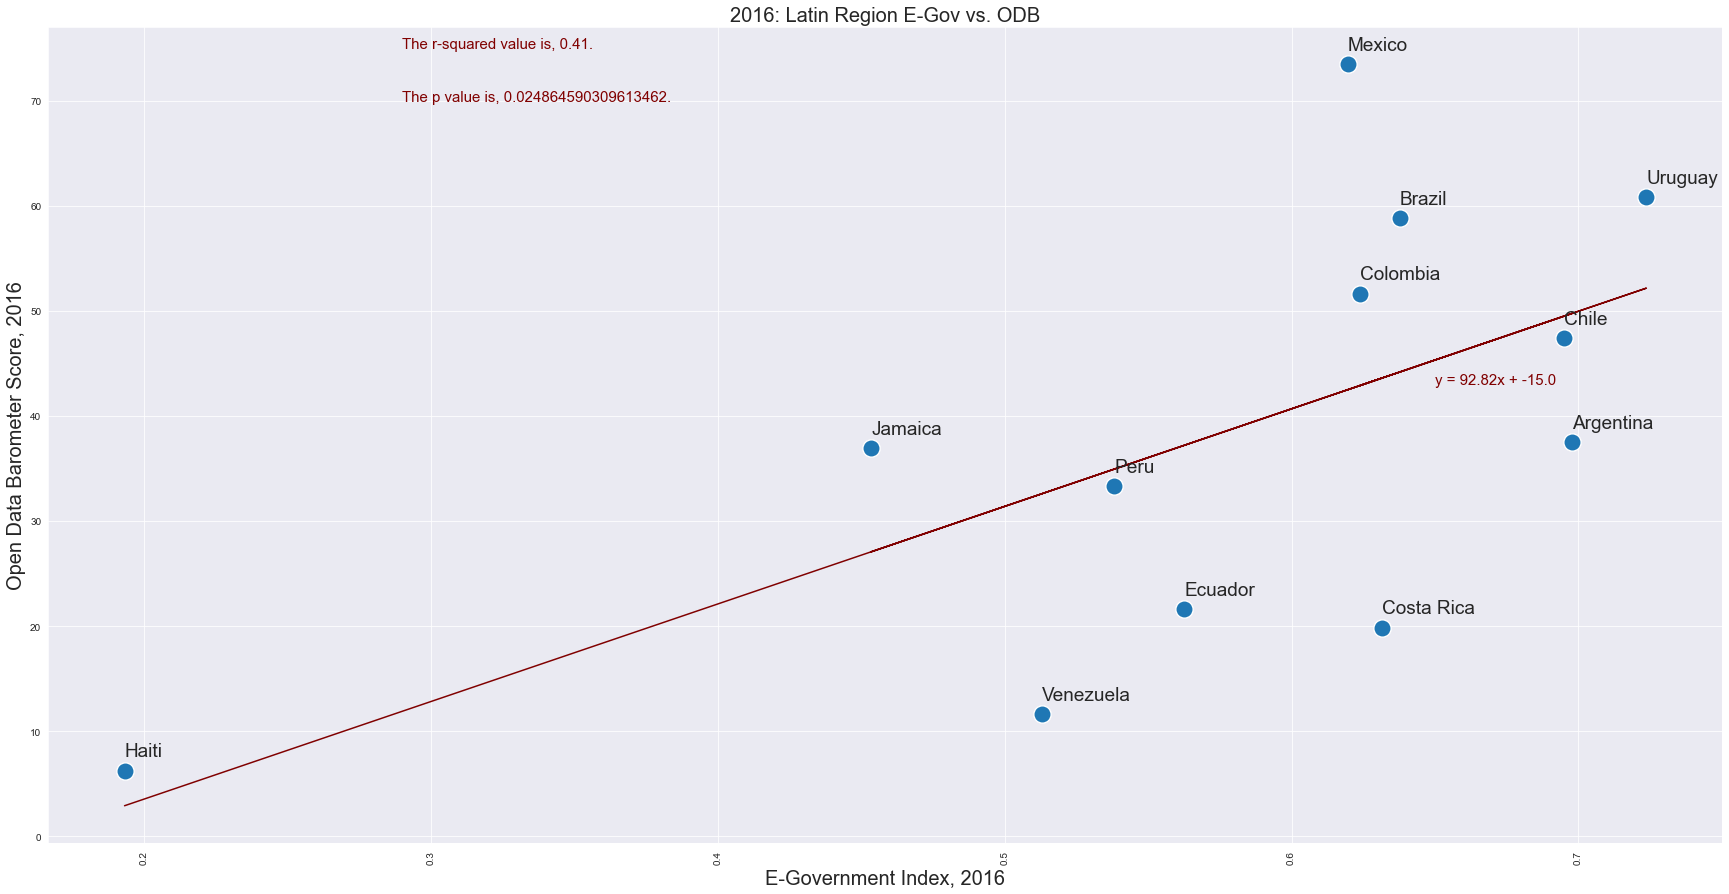

In [96]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(30, 15))
    sns.scatterplot(x = x_axis, y = y_axis, data = latin_region_2016, s=300)
    #Labeling the Graph
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
#     plt.legend(fontsize = 20)
    plt.tight_layout
    #Annotating the linear regression, r-squared and p-values
    plt.annotate(line_eq, text_coordinates, fontsize=15 ,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(latin_region_2016['Country']):
        plt.text(x_axis[i], y_axis[i]+2,label, size=19, ha = 'left', va='center_baseline')
    
country_graph(x_axis, y_axis, "2016: Latin Region E-Gov vs. ODB", "E-Government Index, 2016", "Open Data Barometer Score, 2016", (.65,43), (.29, 75), (.29,70))

There is a lot of movement between 2014 and 2016 in ODB and E-Gov Scores. We can see that in Latin America, many countries had greater open data provisions in 2016, demonstrating improvement in that region. The rsquared value in 2014 is slightly higher, indicating that the data is slightly closer to the linear regression model. 

In [103]:
#Europe region 2014 egov vs odb scores
europe_region_2014 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2014', 'ODB-Score-Scaled_2014']]
europe_region_2014 = europe_region_2014[europe_region_2014['Region_2014'] == 'Europe & Central Asia']
europe_region_2014 = europe_region_2014.reset_index(drop = True)

In [104]:
x_axis = europe_region_2014['E-Government Index_2014']
y_axis = europe_region_2014['ODB-Score-Scaled_2014']

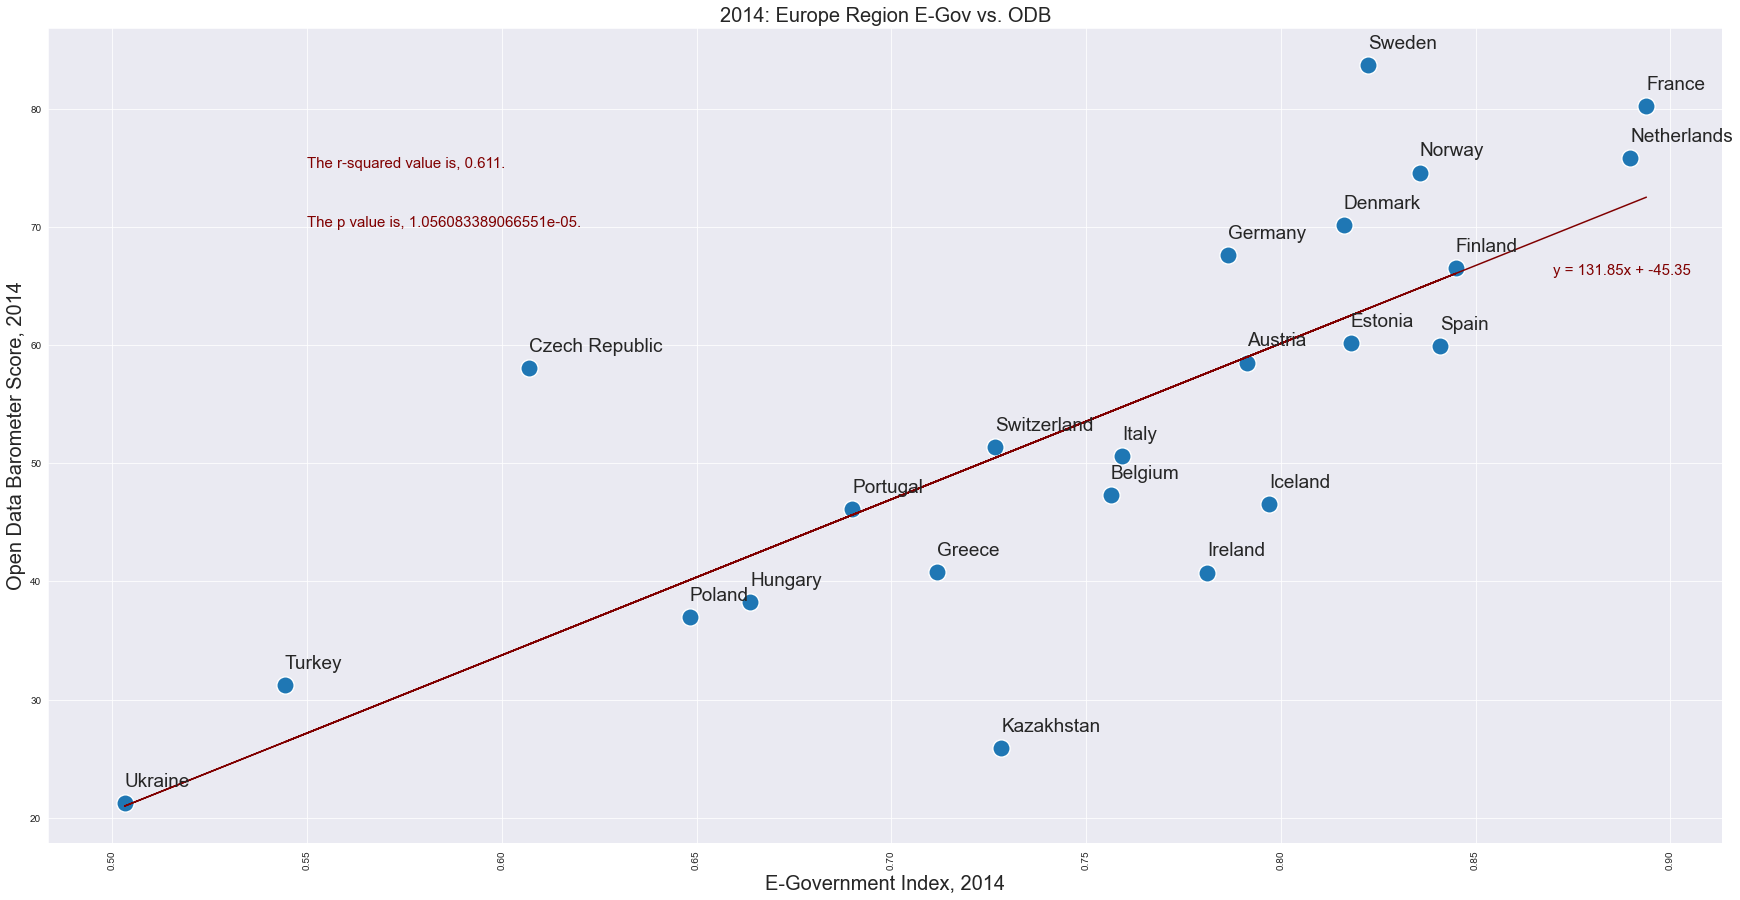

In [109]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(30, 15))
    sns.scatterplot(x = x_axis, y = y_axis, data = latin_region_2016, s=300)
    #Labeling the Graph
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
#     plt.legend(fontsize = 20)
    plt.tight_layout
    #Annotating the linear regression, r-squared and p-values
    plt.annotate(line_eq, text_coordinates, fontsize=15 ,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(europe_region_2014['Country']):
        plt.text(x_axis[i], y_axis[i]+2,label, size=19, ha = 'left', va='center_baseline')
    
country_graph(x_axis, y_axis, "2014: Europe Region E-Gov vs. ODB", "E-Government Index, 2014", "Open Data Barometer Score, 2014", (.87,66), (.55, 75), (.55,70))

In [110]:
#Europe 2016 DF egov vs odb
europe_region_2016 = df_14_16[['Country', 'Region_2014', 'E-Government Index_2016', 'ODB-Score-Scaled_2016']]
europe_region_2016 = europe_region_2016[europe_region_2016['Region_2014'] == 'Europe & Central Asia']
europe_region_2016 = europe_region_2016.reset_index(drop=True)

In [113]:
x_axis = europe_region_2016['E-Government Index_2016']
y_axis = europe_region_2016['ODB-Score-Scaled_2016']

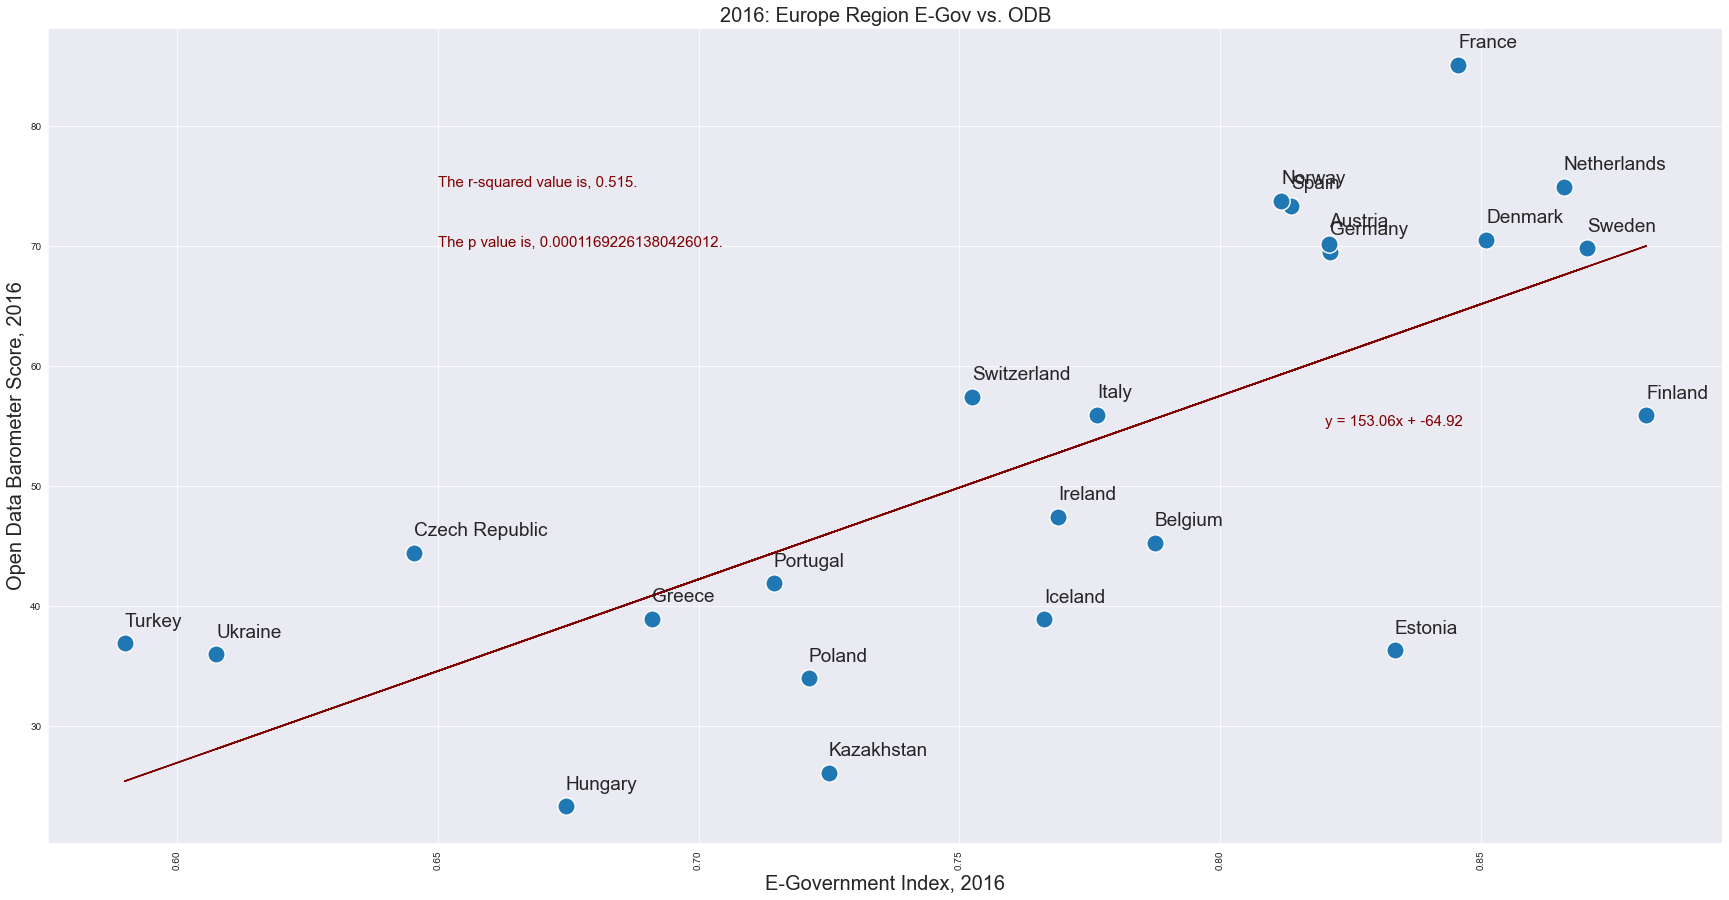

In [117]:
def country_graph(x_axis, y_axis, title, xlabel, ylabel, text_coordinates, coordinates, coordinates2):
    #linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue **2, 3)
    p_value = pvalue
    
    
    sns.set_style('darkgrid')
    plt.figure(figsize=(30, 15))
    sns.scatterplot(x = x_axis, y = y_axis, data = latin_region_2016, s=300)
    #Labeling the Graph
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize = 20)
    plt.xticks(rotation=90)
#     plt.legend(fontsize = 20)
    plt.tight_layout
    #Annotating the linear regression, r-squared and p-values
    plt.annotate(line_eq, text_coordinates, fontsize=15 ,color="maroon")
    plt.plot(x_axis,regress_values,"maroon")
    plt.annotate(f"The r-squared value is, {r_squared}.", coordinates, fontsize=15, color='maroon')
    plt.annotate(f"The p value is, {p_value}.", coordinates2, fontsize=15, color= 'maroon')
    for i, label in enumerate(europe_region_2014['Country']):
        plt.text(x_axis[i], y_axis[i]+2,label, size=19, ha = 'left', va='center_baseline')
    
country_graph(x_axis, y_axis, "2016: Europe Region E-Gov vs. ODB", "E-Government Index, 2016", "Open Data Barometer Score, 2016", (.82,55), (.65, 75), (.65,70))

Between 2014 and 2016, quite a few European countries decreased in their ODB scores however, some increased in their e-governance scores suggesting a lack of continuity in the region.